# Descoberta Guiada

Dataset Iris:

Vamos criar uma IA que separe os tipos de flores presentes do dataset Iris com base unicametne na análise dos dados e utilizando técnicas computacionais mais simples que Machine Learning

In [1]:
from sklearn.datasets import load_iris # carrega o toy dataset Iris

#algumas métricas que usaremos para calcular a assertividade do nosso modelos
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# biblioteca para criação de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# bibliotecas para manipulaão dos datasets
import numpy as np
import pandas as pd

Para essa análise não realizaremso a divisão em treinamento, teste e validação.

Vamos carregar nossos dados:

In [2]:
dados, Y = load_iris(return_X_y=True, as_frame=True)
dados['target'] = Y

In [3]:
dados.groupby('target').agg({'max', 'min', 'mean'})

sepal length (cm)           sepal width (cm)            \
                    mean  min  max             mean  min  max   
target                                                          
0                  5.006  4.3  5.8            3.428  2.3  4.4   
1                  5.936  4.9  7.0            2.770  2.0  3.4   
2                  6.588  4.9  7.9            2.974  2.2  3.8   

       petal length (cm)           petal width (cm)            
                    mean  min  max             mean  min  max  
target                                                         
0                  1.462  1.0  1.9            0.246  0.1  0.6  
1                  4.260  3.0  5.1            1.326  1.0  1.8  
2                  5.552  4.5  6.9            2.026  1.4  2.5

Olhando para esses dados, conseguimos verificar que o "petal lenth" e o "petal width" do target zero (0) é menor que das demais classes, de forma que conseguimos utilizar esses valores para identificar essa classe

**Vamos utilizar gráficos de dispersão para tentar encontrar outras relações que nos auxiliem a identificar as demais classe:**

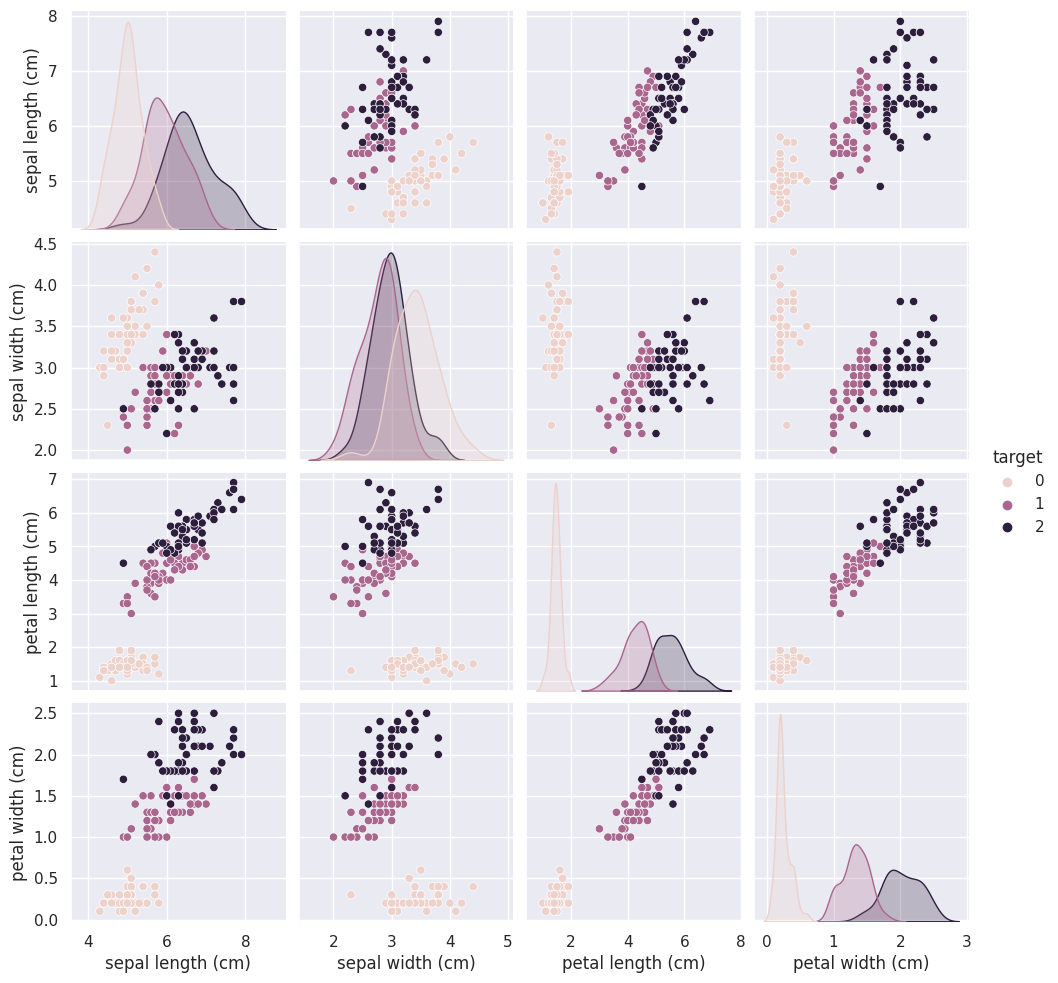

In [4]:
sns.set(style="darkgrid")
sns.pairplot(dados, hue='target')

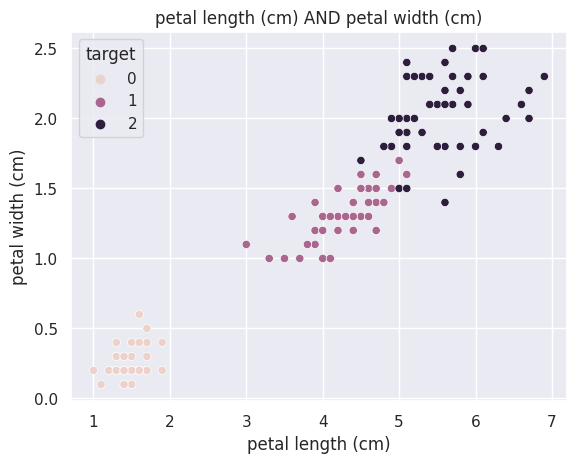

In [5]:
sns.scatterplot(x=dados['petal length (cm)'], y=dados['petal width (cm)'], hue=dados['target'])
plt.title('petal length (cm) AND petal width (cm)');


Podemos ver que valores de menores que 2\~2.5 cm de petal lenght representam a classe 0 e valores entre 2.5 cm e 5 cm de petal length e petal width entre 0.8 e 1.7\~1.8 representam a classe 1. O restante representa a classe 2.

# Vamos montar nosso classificador:

In [6]:
def classificador_iris(dataset: pd.DataFrame) -> pd.DataFrame:
  """
  Função que realiza a predição do dataset iris com base em euristicas encontradas através da anáise de dados
  """
  def predict(x) -> int:
    """
    Função de predição do dataset utilizada na função apply do pandas
    """

    if x['petal length (cm)'] <2.5 and x['petal width (cm)'] < 0.8:
      return 0
    elif x['petal length (cm)'] >=2.5 and x['petal length (cm)'] < 5 \
          and x['petal width (cm)'] >= 0.8 and x['petal width (cm)'] < 1.8 :
      return 1
    else:
      return 2

  dataset['y_pred'] = dataset.apply(predict, axis=1)

  return dataset

In [7]:
dados_pred = classificador_iris(dados)

In [8]:
# validando se não faltou a predição de nenhum dado
dados_pred.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
y_pred               0
dtype: int64

Vamos validar a assertividade do nosso modelo:

In [9]:
matriz_confusao = confusion_matrix(dados['target'], dados['y_pred'])

# Matriz de confusão

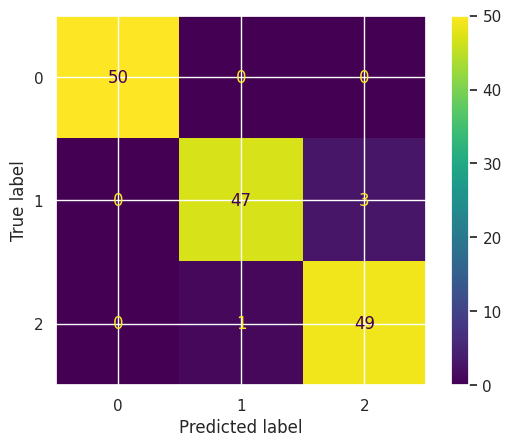

In [10]:
ConfusionMatrixDisplay(matriz_confusao).plot()

# Acurácia do modelo:

Nas próximas aulas vamos validar se a acurácia é mais indicada para esse tipo de problema

In [11]:
accuracy_score(dados['target'], dados['y_pred'])

0.9733333333333334